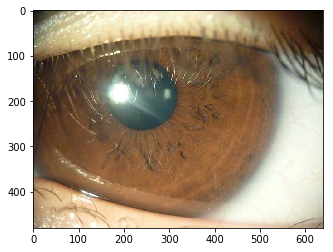

In [1]:
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread('res/Iris 1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

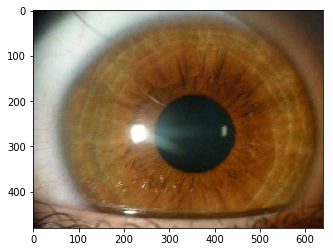

In [11]:
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

img2 = cv2.cvtColor(cv2.imread('res/Iris 2.jpeg'), cv2.COLOR_BGR2RGB)
plt.imshow(img2)

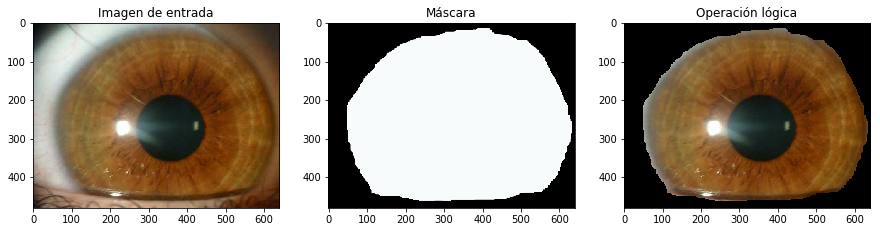

In [12]:
mascara = cv2.imread('res/mask 2.png')/255
mascara = cv2.resize(mascara, (img2.shape[1], img2.shape[0]))
#out = img * np.logical_and(img, np.logical_not(mascara))
out = img2 * mascara
out = img2 * np.logical_and(img2,(mascara))
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(img2, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

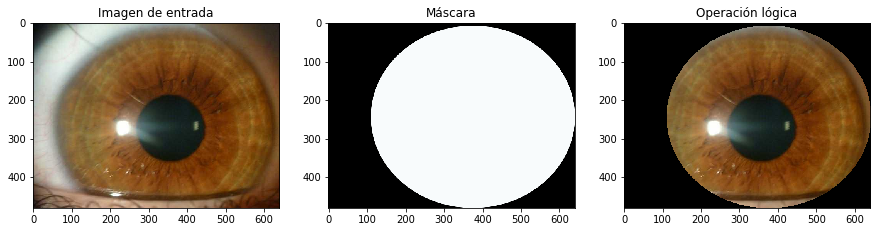

In [13]:
mask = cv2.imread('res/mask.png')/255
mask = cv2.resize(mask, (img2.shape[1], img2.shape[0]))
#out = img * np.logical_and(img, np.logical_not(mascara))
out2 = img2 * mask
out2 = img2 * np.logical_and(img2,(mask))
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(img2, cmap='gray')
ax2.imshow(mask, cmap='gray')
ax3.imshow(out2, cmap='gray')

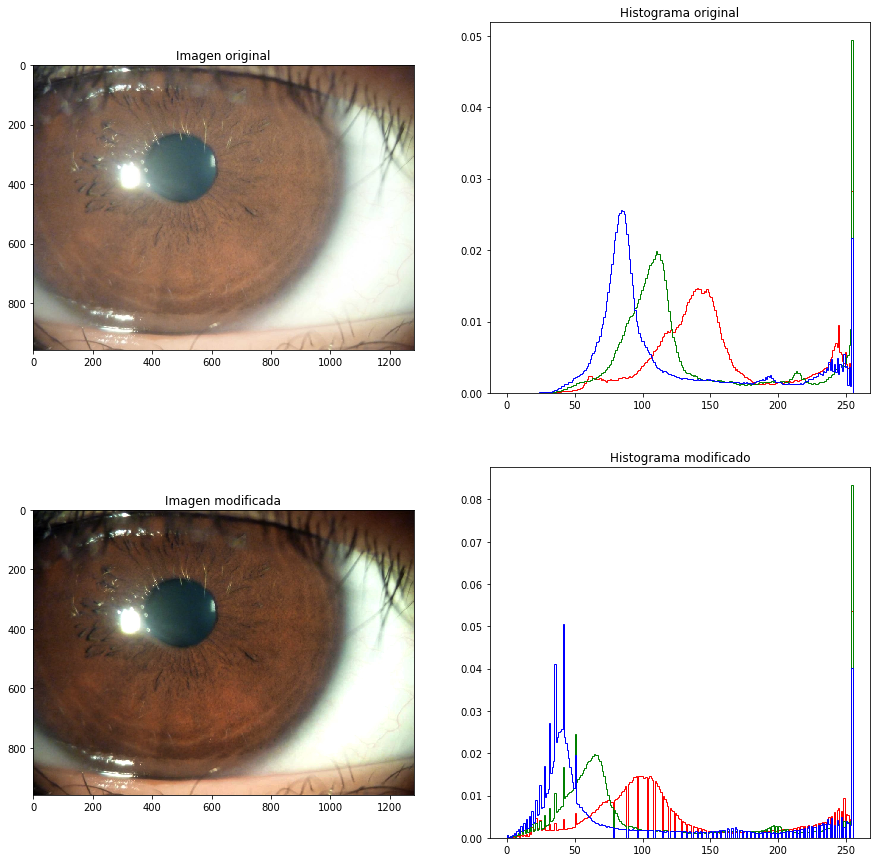

In [84]:
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt


def apply_f_on_rgb(img, f, args):
    
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def non_linear_parabola(img, a, b, c):
    
    img_copy = img.astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    res_b = cv2.multiply(img_copy,b)
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

img = cv2.cvtColor(cv2.imread('res/iris_lc.jpg'), cv2.COLOR_BGR2RGB)

a = 0.7
b = 0.4
c = -0.05


iris2 = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

cv2.imwrite('mod1.png',img)

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(iris2, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = iris2[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
mod1= img

C:\Users\jd-10\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


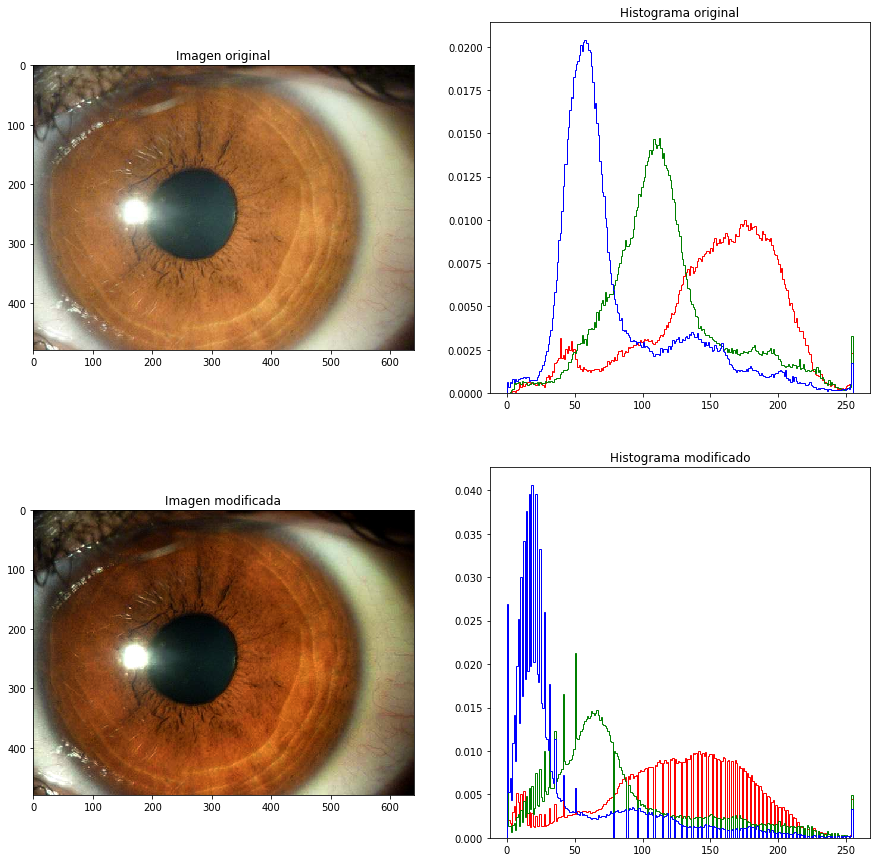

In [2]:
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt


def apply_f_on_rgb(img, f, args):
    
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def non_linear_parabola(img, a, b, c):
    
    img_copy = img.astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    res_b = cv2.multiply(img_copy,b)
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

img = cv2.cvtColor(cv2.imread('res/iris_lc2.jpg'), cv2.COLOR_BGR2RGB)

a = 0.7
b = 0.4
c = -0.05


iris1 = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

cv2.imwrite('mod2.png',img)

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(iris1, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = iris1[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
mod2=img

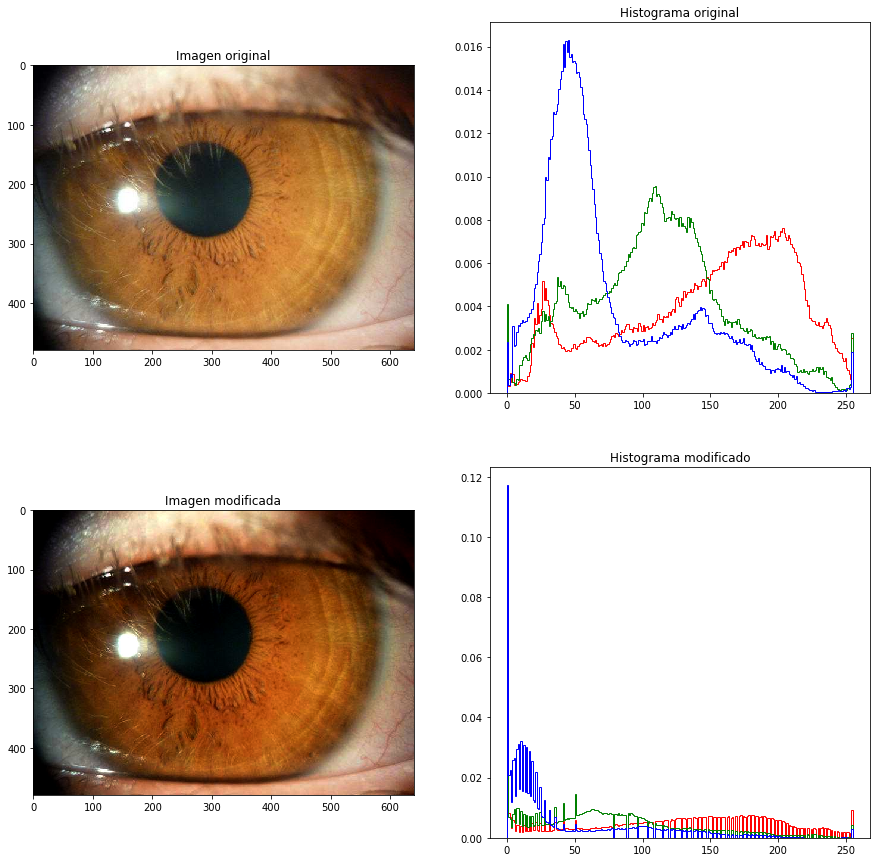

In [35]:
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt


def apply_f_on_rgb(img, f, args):
    
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def non_linear_parabola(img, a, b, c):
    
    img_copy = img.astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    res_b = cv2.multiply(img_copy,b)
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

img = cv2.cvtColor(cv2.imread('res/iris_p1.jpeg'), cv2.COLOR_BGR2RGB)

a = 0.7
b = 0.4
c = -0.05


res = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

cv2.imwrite('mod3.png',img)

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

mod3=img

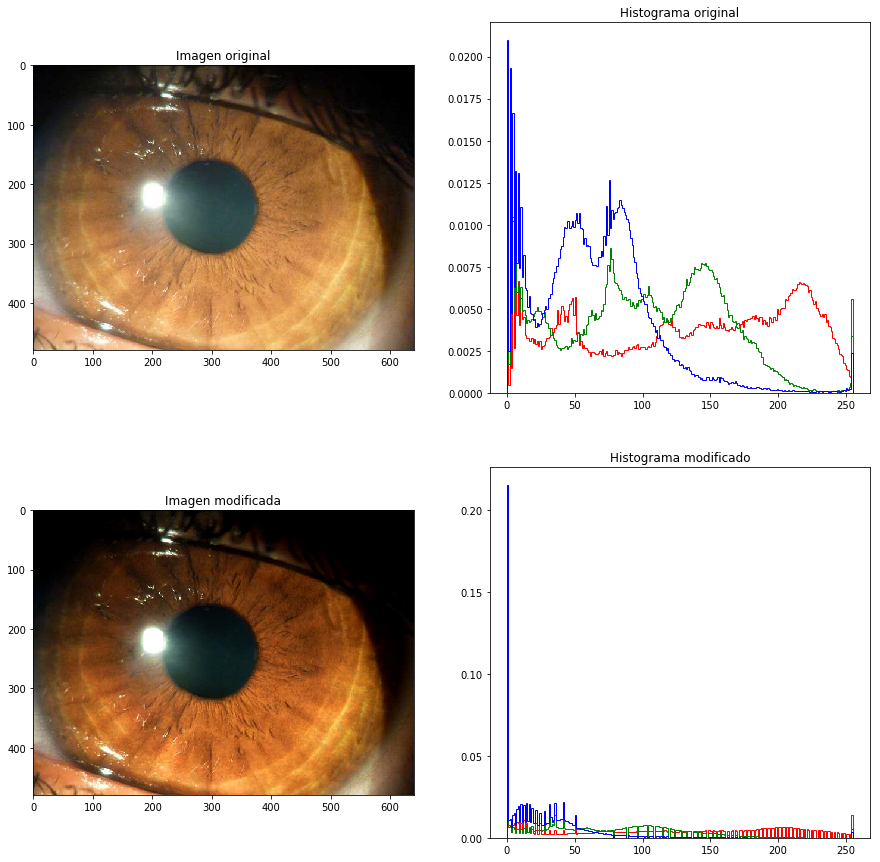

In [93]:

def apply_f_on_rgb(img, f, args):
    
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def non_linear_parabola(img, a, b, c):
    
    img_copy = img.astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    res_b = cv2.multiply(img_copy,b)
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

img = cv2.cvtColor(cv2.imread('res/iris 4.jpeg'), cv2.COLOR_BGR2RGB)

a = 0.7
b = 0.4
c = -0.05


iris4 = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

cv2.imwrite('mod4.jpeg',img)

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(iris4, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = iris4[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
mod4=img

In [40]:
cv2.imshow(img)

TypeError: imshow() missing required argument 'mat' (pos 2)

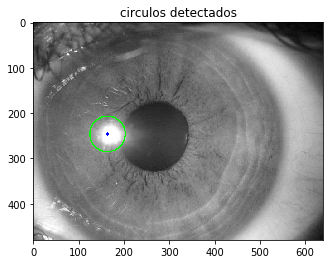

In [92]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('res/iris_lc2.jpg', cv2.IMREAD_GRAYSCALE)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=70,minRadius=20,maxRadius=80)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.title('circulos detectados')
plt.imshow(cimg)

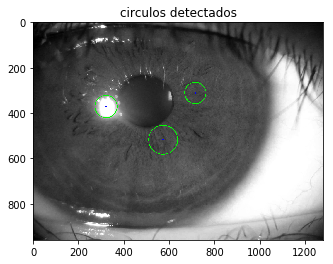

In [88]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.cvtColor(iris2, cv2.COLOR_RGB2GRAY)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=70,minRadius=0,maxRadius=150)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.title('circulos detectados')
plt.imshow(cimg)

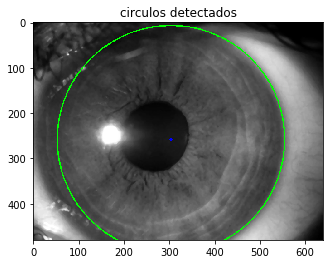

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.cvtColor(iris1, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=70,minRadius=235,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.title('circulos detectados')
plt.imshow(cimg)


In [7]:
cantidad = len(circles)
print(cantidad)

1


In [11]:
## Coordenadas circulos
circulo = circles[0]
print(circulo[0][0], circulo[0][1])

304 258


In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgl = cv2.cvtColor(iris1, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(imgl,50,150)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for i in lines:
    x1,y1,x2,y2 = i[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(imgl,cmap='gray')

TypeError: 'NoneType' object is not iterable

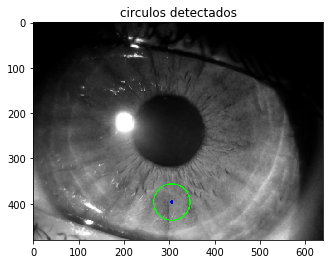

In [114]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.cvtColor(iris4, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,3)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=70,minRadius=0,maxRadius=90)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.title('circulos detectados')
plt.imshow(cimg)

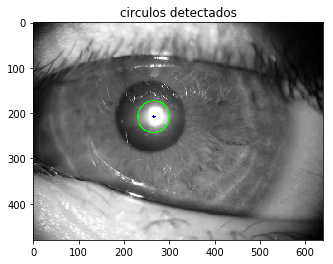

In [115]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('res/Iris5.jpeg', cv2.IMREAD_GRAYSCALE)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=70,minRadius=20,maxRadius=80)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.title('circulos detectados')
plt.imshow(cimg)

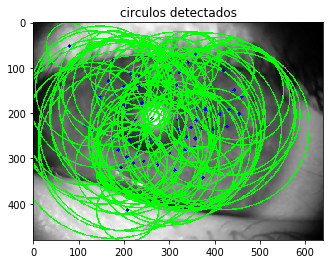

In [127]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('res/Iris5.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=70,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.title('circulos detectados')
plt.imshow(cimg)